`WUR Machine Learning Course - Project Assignment 3 - Version 2022`

# **Clustering with K-Means**
Clustering helps to understand how data samples are related to each other. Clusters are composed by points that are similar to each other, but relatively different to the rest of points. Clustering methods do not need data labels and therefore are called *unsupervised*, as opposed to supervised ones that we discussed in the previous exercises. In datasets where no labels are available, finding clusters of data points can help grouping the data samples in a principled way.

# **Instructions**
In this exercise you will code the k-means algorithm by prototyping on a synthetic dataset, and then use it to find clusters of world cities based on some of their statistics. You will then analyze the clusters to characterize the different types of cities based on their clustering.

# **Environment set-up**

In [ ]:
## Importing tabular data
import pandas as pd

## Plotting and visualization
from matplotlib import pyplot as plt

import numpy as np
import random
from sklearn.metrics.pairwise import pairwise_distances

# **Importing files to Colab**

Run the cell below and check if there is a new folder created on colab with the name `data` containing several `.csv` files with data.

In [ ]:
! git clone https://gist.github.com/dmarcosg/d01e120a4e33d4c11de30091259ed51e data

Cloning into 'data'...
remote: Enumerating objects: 11, done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 11
Unpacking objects: 100% (11/11), 14.02 KiB | 1.27 MiB/s, done.


Now we can load `data2d.csv`, which contains 200 data points and 2 variables.

In [ ]:
data2d = pd.read_csv('data/data2d.csv',header=None)

## Convert toy 2D data from pandas to numpy array
data2d = np.array(data2d)
print(data2d.shape)
# print(data2d)

(200, 2)


# **K-Means implementation and toy 2D data**

We have seen how k-means works during the lectures. First use one or more code cells to experiment with the different operations you will need:


*   Initialize the cluster centroids using `K` randomly selected data points. One way to do this is by using the `random.sample()` function.
*   Compute the distance between each data point and each cluster centroid. This can be efficiently done by using the `pairwise_distances` function included in the `sklearn` package.
*   Find the nearest cluster centroid for each data point. One way is to use the `numpy` function `argmin()`.
*   Update each cluster centroid by computing the mean of all data points assigned to it.





### **Let's start by taking a look at the data**

Text(0, 0.5, 'Variable 1')

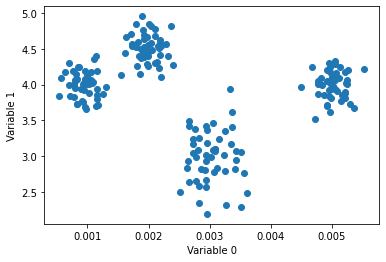

In [ ]:
## Visualize the 2D data

plt.scatter(data2d[:,0],data2d[:,1])
plt.xlabel('Variable 0')
plt.ylabel('Variable 1')

**``Action 1``**

`` Initialize the cluster centroids``

In [ ]:
# Normalize Dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data2d = scaler.fit_transform(data2d)

#print(data2d)

K = 4

## TODO: Choose K data points as initial cluster centroids
random.seed(10)
random_indeces = random.sample(range(199), K)
cluster_centroids = []
for i in range(len(random_indeces)):
  cluster_centroids.append(data2d[random_indeces[i]])
#print(random_indeces)
print(cluster_centroids)



[array([ 0.226123  , -1.27546475]), array([-0.42347235,  0.71432019]), array([ 0.13105608, -1.4294694 ]), array([ 0.3239047 , -1.41466577])]


**``Question 1``**

`` Why do we randomly select existing data points for the initialization, instead of just assigning random values?``

To initialize our K-mean classifier, we need to start with a random set of K centroids to create the initial clusters without adding bias.

**``Action 2``**

`` Compute distance between all data points and all centroids (which should result in a matrix of distances of shape [N,K], with N the number of data points and K the number of clusters) and get the closest centroid to each data point (which should result in a vector of shape [N] where each entry is an integer between 0 and K-1).``

In [ ]:
## TODO: Compute distance between all data points and all centroids
distances = pairwise_distances(data2d, cluster_centroids);
# print(distances)
## TODO: Get the closest centroid to each data point
cluster_assignments = np.argmin(distances, axis=1)
print(cluster_assignments)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 3 0 0 0 0 0 2 2
 2 0 3 0 2 0 2 0 3 2 3 0 3 2 2 2 3 2 1 0 2 2 3 0 3 2 0 2 2 0 3 2 2 0 0 0 0
 3 2 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0]


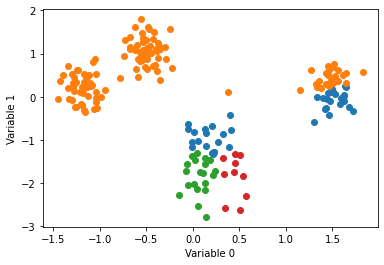

In [ ]:
## Plot the cluster assignments with this code
for i in range(K):
  plt.scatter(data2d[cluster_assignments==i,0],data2d[cluster_assignments==i,1])
  plt.xlabel('Variable 0')
  plt.ylabel('Variable 1')
plt.show()

**``Question 2``**

`` If you haven't used any data normalization, you might find surprising the centroid assignment. Why do you think is that?``

The centroids are weirdly placed. This could be due to the fact that the variable 1 scale is several orders of magnitude bigger than variable 2.

**``Action 3``**

`` Go back to Actions 1 and 2 but, this time, normalize the data such that both variables have a similar range.``

**``Question 3``**

`` What effect does the normalization have in the cluster assignment?``

The clusters have better spatial distributions as they do not overlap as was the case earlier.

**``Action 4``**

`` Fill in the next code cell to implement the cluster centroid update.``

In [ ]:
print(cluster_centroids)

## TODO: Update the centroids
for i in range(K):
  indices = []
  points = []
  # Adding Indices of points to indices list
  for j in range(len(cluster_assignments)):
    if cluster_assignments[j] == i:
      indices.append(j)
  # print(indices)
  # Adding the points corresponding to indices to the points list
  for c in indices:
    points.append(data2d[c])
  #print(points)
  # Calculating centroids of points
  mean = np.mean(points, axis=0)
  print(mean)
  
  cluster_centroids[i] = mean

print(cluster_centroids)

[array([ 0.226123  , -1.27546475]), array([-0.42347235,  0.71432019]), array([ 0.13105608, -1.4294694 ]), array([ 0.3239047 , -1.41466577])]
[ 0.92255981 -0.45313771]
[-0.35794072  0.58873026]
[ 0.06590027 -1.84015301]
[ 0.44703935 -1.84807609]
[array([ 0.92255981, -0.45313771]), array([-0.35794072,  0.58873026]), array([ 0.06590027, -1.84015301]), array([ 0.44703935, -1.84807609])]


**``Question 4``**

`` What happens to the cluster centroids after you update them?``

They change to the new values of the means based on the points that are  closest to the old centroid.

**``Action 5``**

`` Fill in the following function definition to create your own K-Means function.``

In [ ]:
def my_kmeans(data, K=4, maxiter=10, do_plot=False, seed=False):
  ## TODO: Choose K data points as initial cluster centroids
  if seed == True: 
    random.seed(42)
  random_indeces = random.sample(range(199), K)
  cluster_centroids = []
  for i in range(len(random_indeces)):
    cluster_centroids.append(data[random_indeces[i]])

  ## Loop over iterations
  for iter in range(maxiter):
    ## TODO: Compute distance between all data points and all centroids
    distances = pairwise_distances(data, cluster_centroids);

    ## TODO: Get the closest centroid to each data point
    cluster_assignments = np.argmin(distances, axis=1)

    ## TODO: Update the centroids
    for i in range(K):
      indices = []
      points = []
      # Adding indices of points to indices list
      for j in range(len(cluster_assignments)):
        if cluster_assignments[j] == i:
          indices.append(j)
      # Adding the points corresponding to indices to the points list
      for c in indices:
          points.append(data[c])
      # Calculating centroids of points & updating cluster centroids list
      mean = np.mean(points, axis=0)
      cluster_centroids[i] = mean

    ## Optionally, plot the data and assignments. Only for 2D data.
    if do_plot:
      for i in range(K):
        plt.scatter(data[cluster_assignments==i,0],data[cluster_assignments==i,1])
        plt.xlabel('Variable 0')
        plt.ylabel('Variable 1')
        plt.title('Iteration #%d' % (iter+1))
      plt.show()
  return cluster_assignments, cluster_centroids


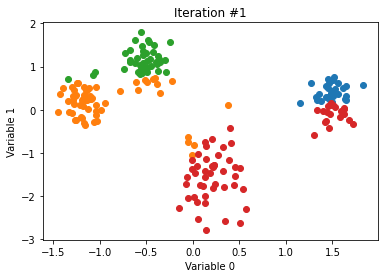

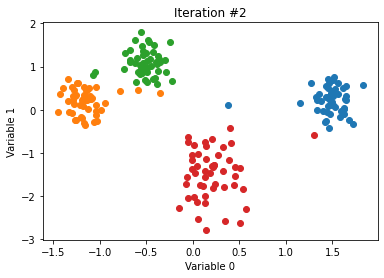

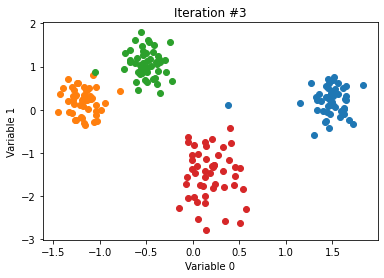

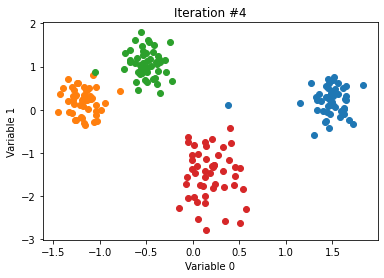

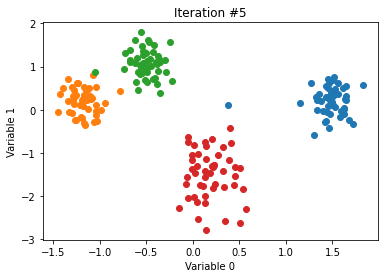

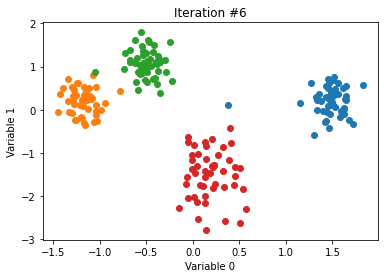

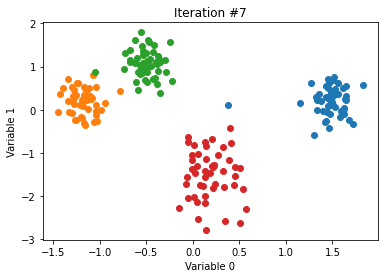

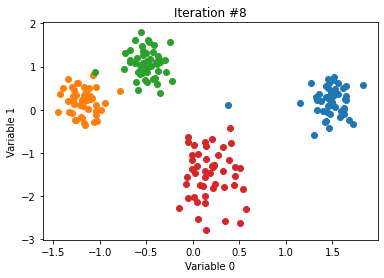

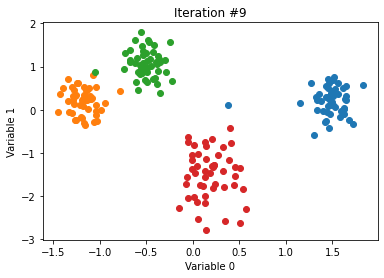

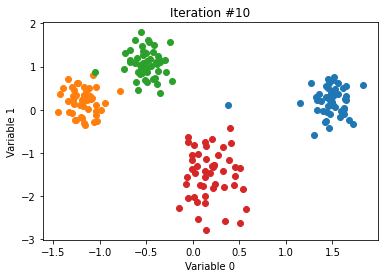

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 [array([1.47380913, 0.20364509]),
  array([-1.17815242,  0.20082205]),
  array([-0.50559204,  1.06205028]),
  array([ 0.18414198, -1.50060237])])

In [ ]:
## Run your implemented kmeans function on the 2D data
my_kmeans(data2d,do_plot=True, seed=True)

**``Question 5``**

`` What happens to the cluster centroids as the iterations progress? When do they stop changing?``

The clusters become more compact through the progressive iterations, until they reach an equilibrium. In this case, the equilibrium with well distributed clusters is reached at iteration 3. After that, the clusters do not change. 

# **Exploring some real data about cities**

This dataset containts several features concerning urban areas in OECD countries. Start by running the following code cell and taking a look at the loaded variables. `data_cities` contains the eight variables, `feature_names` contains the names of the variables and `regions` contains the name of the geographic region where each city is located.

In [ ]:
## Read the .csv files
country_regions = pd.read_csv('data/country_codes.csv')
oecd_cities_stats = pd.read_csv('data/oecd_cities_stats.csv')

## Extract the variables and their names
data_cities = np.array(oecd_cities_stats.iloc[1:,1:],dtype=np.float32)
number_of_variables = data_cities.shape[1]
feature_names = list(oecd_cities_stats.columns.values[1:])

## Extract the country codes and region name of each city
country_codes = []
regions = []
for name in oecd_cities_stats['Metropolitan areas'][1:]:
  country_codes.append(name[0:2])
  regions.append(country_regions[name[0:2]][1])
regions = np.array(regions)
country_codes = np.array(country_codes)

print(data_cities.shape)

(280, 8)


In [ ]:
print(regions)

['Oceania' 'Oceania' 'Oceania' 'Oceania' 'Oceania' 'Oceania'
 'Central Europe' 'Central Europe' 'Central Europe' 'Western Europe'
 'Western Europe' 'Western Europe' 'Western Europe' 'North America'
 'North America' 'North America' 'North America' 'North America'
 'North America' 'North America' 'North America' 'North America'
 'Central Europe' 'Central Europe' 'Central Europe' 'Latin America'
 'Latin America' 'Latin America' 'Central Europe' 'Central Europe'
 'Central Europe' 'Central Europe' 'Central Europe' 'Central Europe'
 'Central Europe' 'Central Europe' 'Central Europe' 'Central Europe'
 'Central Europe' 'Central Europe' 'Central Europe' 'Central Europe'
 'Central Europe' 'Central Europe' 'Central Europe' 'Central Europe'
 'Central Europe' 'Central Europe' 'Central Europe' 'Central Europe'
 'Central Europe' 'Central Europe' 'Central Europe' 'Central Europe'
 'Central Europe' 'Northern Europe' 'Eastern Europe' 'Southern Europe'
 'Southern Europe' 'Southern Europe' 'Southern Europ

**``Action 6``**

``Run K-Means clustering on data_cities.``

In [ ]:
## TODO: Run K-Means clustering on data_cities
K = 4
# Normalize data_cities if needed
data_cities = scaler.fit_transform(data_cities)
print(data_cities)

cluster_assignments, cluster_centroids = my_kmeans(data_cities,K=K)

[[ 7.7004713e-01  1.7046496e-01 -3.5015982e-01 ...  7.2252613e-01
  -1.7293274e+00 -4.1167098e-01]
 [ 6.5237296e-01  4.0397909e-03 -3.3884889e-01 ...  6.7563385e-01
  -1.2453980e+00 -2.8747272e-01]
 [ 4.9710363e-02  3.5014531e-01 -5.1776642e-01 ... -8.1730276e-02
  -1.7898186e+00 -3.5450032e-01]
 ...
 [-4.3461922e-01  1.0941430e-03 -9.9263944e-02 ...  1.4133687e+00
  -3.9852163e-01 -5.8790013e-02]
 [-2.5291720e-01  1.5975989e+00 -9.8665375e-01 ...  9.2917919e-01
  -1.5075265e+00 -6.3443941e-01]
 [-2.4454933e-01 -5.7034862e-01  1.3723615e-01 ...  1.4133687e+00
  -3.1786680e-01 -1.9481677e-01]]


In [ ]:
print(cluster_assignments)

[0 0 0 0 0 0 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 3 3 3 0 0 0 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 1 1 1 1 1 1 1 1 0 2 3 0 3 3 0 0 3
 3 3 0 3 3 3 0 1 1 3 0 3 3 1 3 1 3 3 1 3 1 3 3 3 2 3 2 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 0 2 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 3 3 3 3
 3 3 3 3 1 1 0 3 3 3 2 0 0 0 3 0 3 0 3 3 0 3 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**``Question 6``**

``Do you think it is important to normalize the data also in this case?``

The features in this dataset have very different units, therefore normalizing the data is necessary to have a well balanced clustering. Otherwise, some variables would have a bigger weight in the clustering than other variables. 

**``Action 7``**

``Use the provided code to visualize each centroid.``

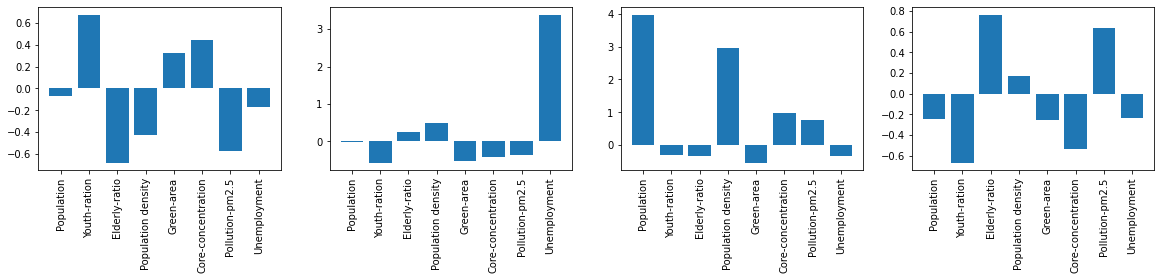

In [ ]:
fig, ax = plt.subplots(1,K,figsize=(5*K, 3))
for i in range(K):
  ax[i].bar(np.arange(number_of_variables),cluster_centroids[i])
  ax[i].set_xticks(np.arange(number_of_variables))
  ax[i].set_xticklabels(feature_names,rotation = 90)

**``Question 7``**

``What are the main characteristics of each cluster?``

Cluster 1 is recognized by its high youth ratio and low elderly ratio.
Cluster 2 is characterized by its high unemployment rate. 
Cluster 3 is distinguished by its high population and density. 
Cluster 4 is the opposite of cluster 1, identifiable by its low youth ratio and high elderly ratio, as well as its significantly low core-concentration. 

**``Action 8``**

``It would also be informative to know which regions are associated with each cluster. Starting with the previous code cell, plot pie charts displaying the proportions of each region per cluster. For this, you will find the numpy function unique() very useful. Take a look at the documentation to make sure that it returns both the unique regions present and the counts. For the pie charts, matplotlib has a plt.pie() function that will do the job.``

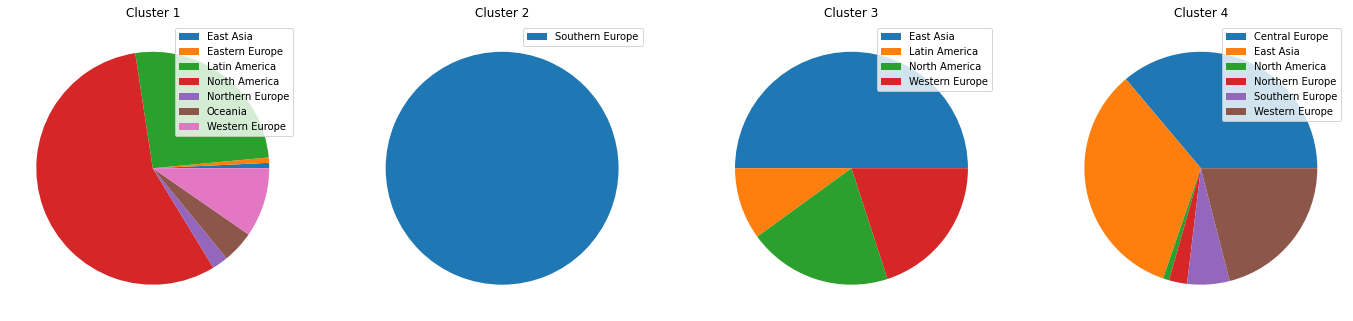

In [ ]:
## TODO: Plot region proportions per cluster

fig, ax = plt.subplots(1, K, figsize=(6*K, 7))

for i in range(K): 
  indices = []
  region_l = []
  # Extract indices from cluster
  for j in range(len(cluster_assignments)): 
    if cluster_assignments[j] == i: 
      indices += [j]
  # Adding region corresponding to indices to region list
  for c in indices: 
    region_l += [regions[c]]
  # Creating arrays for pie input
  region_names, region_freq = np.unique(region_l, return_counts = True)
  # Creating
  ax[i].pie(region_freq)
  ax[i].set_title('Cluster %d' % (i+1))
  ax[i].legend(region_names, loc='upper right')
  
  



**``Question 8``**

``Discuss some characteristics of each region by looking at both the bar plots and the pie charts.``

We see that Southern Europe is heavily characterized by the high unemployment rates. 
We see that East Asia and Latin America are placed in cluster 3, which is characterized by high pollution and very high population density. This makes sense as East Asia has a concentration of megacities. 
North America and Latin America fit in cluster 1 with a high youth ratio. 
Europe mainly fits in cluster 4, characterized by its elderly population. 

In summary, there is a relatively clear distinction between developed and developing countries. 